In [44]:
import os
import sys
sys.path.insert(0, os.path.realpath('__file__'))

import numpy as np
import matplotlib.pyplot as plt
import pyEMA

In [45]:
freq, H1_main = np.load("./data/acc_data.npy", allow_pickle=True)

In [46]:
freq.shape, H1_main.shape

((9999,), (6, 7, 9999))

In [48]:
#Impact , accelerometer
FRF = H1_main[:,1,:]

freq = freq
acc = pyEMA.lscf(frf=FRF, 
                 freq=freq,
                 lower=10, 
                 upper=5000,
                 pol_order_high=60)

In [49]:
acc.get_poles(show_progress=True)

100%|███████████████████████████████████████████████████████████████| 60/60 [00:01<00:00, 22.46it/s]


In [50]:
acc.stab_chart(acc.all_poles, legend = True)

100%|███████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 80.44it/s]


SHIFT + LEFT mouse button to pick a pole.
RIGHT mouse button to erase the last pick.
1. Frequency: ~173 -->	176.05095032575232 Hz	(xi = 0.0086)
2. Frequency: ~475 -->	476.51419337030967 Hz	(xi = 0.0019)
3. Frequency: ~935 -->	932.252690546902 Hz	(xi = 0.0015)
4. Frequency: ~1533 -->	1534.766906054919 Hz	(xi = 0.0019)
5. Frequency: ~2279 -->	2286.351022619412 Hz	(xi = 0.0028)
6. Frequency: ~3168 -->	3162.205930654124 Hz	(xi = 0.0016)
7. Frequency: ~4173 -->	4166.718909031299 Hz	(xi = 0.0019)


<Figure size 432x288 with 0 Axes>

In [7]:
# Alternatively the frequencies can be defines as a list, e.g.:
n_freq =  [176,476,932,1534,2258,3161,4180]
acc.select_closest_poles(n_freq)

100%|██████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 116.28it/s]


In [51]:
# Reconstruction of FRF
frf_rec, modal_const = acc.lsfd(whose_poles='own', FRF_ind='all')

The selected natural frequencies and corresponding damping factors:

In [52]:
acc.print_modal_data()

   Nat. f.      Damping
-----------------------
1)  176.1	0.0086
2)  476.5	0.0019
3)  932.3	0.0015
4) 1534.8	0.0019
5) 2286.4	0.0028
6) 3162.2	0.0016
7) 4166.7	0.0019


Modal constants and residuals (last but one is the lower residual, last one is the upper residual):

In [53]:
acc.A[:,:3]

array([[-1.81491769e+01  -44.93053837j, -1.39031961e+02 -404.08566526j,
        -4.19753474e+01 -171.72827295j],
       [ 5.40275666e+00   +4.16074861j,  2.66267265e+02 +694.80140039j,
         2.79234762e+02+1782.69775494j],
       [-5.11834258e-01  +33.60319576j,  2.24790935e+02 +447.39861387j,
        -3.73640769e+02-1209.73210739j],
       [ 6.82909109e+00  +30.3236075j , -2.35466854e+02 -435.431821j  ,
        -3.99481763e+02-1228.88792753j],
       [ 8.55393538e+00   +4.28977951j, -3.45153283e+02 -630.1882877j ,
         5.66038739e+02+1631.98584885j],
       [-1.97264561e+01  -33.44865921j,  1.75118083e+02 +330.99311426j,
        -9.96419401e+01 -221.21689589j]])

Real part of modal constants:

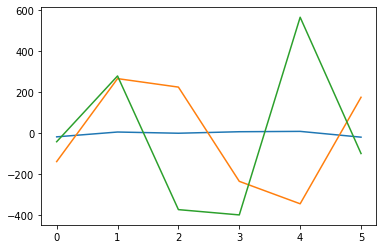

In [57]:
plt.plot(np.real(acc.A[:,:3]))

Showing the reconstructed FRF

In [58]:
FRF.shape

(6, 9999)

In [59]:
freq.shape

(9999,)

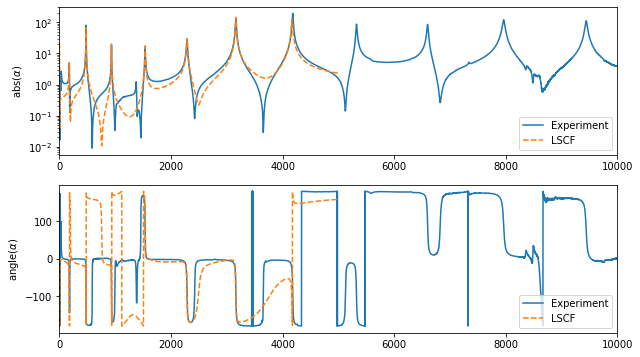

In [60]:
freq_a = acc.freq
select_loc = 0

plt.figure(figsize = ((10,6)))
plt.subplot(211)

plt.semilogy(freq, np.abs(FRF[select_loc]), label='Experiment')
plt.semilogy(freq_a, np.abs(frf_rec[select_loc]),'--', label='LSCF')
plt.xlim(0,freq[-1])
plt.ylabel(r"abs($\alpha$)")

plt.legend(loc = 'best')

plt.subplot(212)
plt.plot(freq, np.angle(FRF[select_loc],deg = 1), label='Experiment')
plt.plot(freq_a, np.angle(frf_rec[select_loc],deg = 1),'--',label='LSCF')
plt.xlim(0,freq[-1])

plt.ylabel(r"angle($\alpha$)")
plt.legend(loc = 'best')